<a href="https://colab.research.google.com/github/pramodh-1612/ML---Polynomial-Lasso-regression/blob/master/LassoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
def soft_threshold(rho,lamda):
    #value with which you need to replace the parameter with
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

In [0]:
def coord_desc(params,X,y,lamda=0.01,iterations =100,constant_term =False):

  #applying coordinate descent to the dataset
  m,n = X.shape
  X/np.linalg.norm(X,axis=0) #normalize

  for i in range(iterations):

    for j in range(n):

      Xj = X[:,j].reshape(-1,1) #because we need the j th coordinate to minimize
      y_pred = X@params
      rho = (Xj.T)@(y - y_pred + params[j]*Xj)

      if(constant_term == True):

        if(j==0):

          params[j] = rho
        else:
          params[j] = soft_threshold(rho,lamda)   
      else:

        params[j] = soft_threshold(rho,lamda)

  return params.flatten()      

In [0]:
from sklearn import datasets
from sklearn import linear_model

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1,1,)

In [0]:
X.shape,y.shape

((442, 10), (442, 1))

(0.7079457843841379, 1412.537544622754, -677.9601687709634, 751.6332120708294)

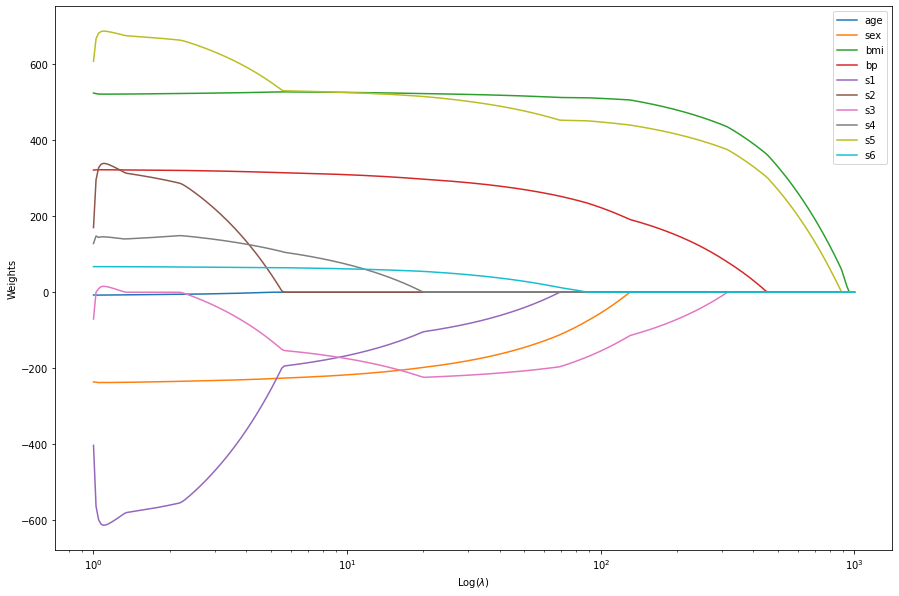

In [0]:
m,n = X.shape
params_initial = np.ones((n,1))
param_list = list()
lamda = np.logspace(1,4,300)/10

for l in lamda:
  param = coord_desc(params_initial,X,y,lamda=l,iterations = 50)
  param_list.append(param)

param_stack = np.stack(param_list).T

plt.figure(figsize = (15,10))

for i in range(n):
    plt.plot(lamda, param_stack[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Weights')
plt.legend()
plt.axis('tight')



(6.545782818637954e-05,
 3.524476239294173,
 -861.120524805656,
 825.1469480793228)

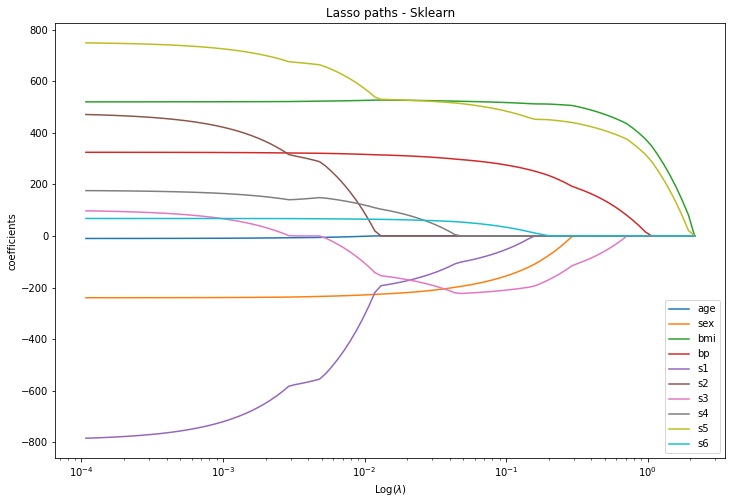

In [0]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X / np.linalg.norm(X,axis=0)  
m,n = X.shape

epsilon = 5e-5  

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, epsilon, fit_intercept=False)

plt.figure(figsize = (12,8))
#neg_log_alphas_lasso = -np.log10(alphas_lasso)

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')